In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [74]:
nfl_teams=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", 
           "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LA", "MIA", 
           "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", 
           "TEN", "WAS"]

ep_sets = []
down = 1
distance = 10

unfinished = []

for team in nfl_teams:
    try:
        ep_set_df = pd.read_csv('final_team/team-data/biased_eps_'+team+'/eps.csv')
        ep_set = ep_set_df[ep_set_df['Down'] == down]
        ep_set = ep_set[((ep_set['Distance'] == distance) & (ep_set['Yardline'] >= distance)) | ((ep_set['Yardline'] < distance) 
                                                                                                    & (ep_set['Distance'] == ep_set['Yardline']))]
        ep_sets.append((team, ep_set))
    except:
        unfinished.append(team)
        pass

nfl = pd.read_csv('final_team/nfl_eps/eps.csv')
ep_set_nfl = nfl[nfl['Down'] == down]
ep_set_nfl = ep_set_nfl[((ep_set_nfl['Distance'] == distance) & (ep_set_nfl['Yardline'] >= distance)) | ((ep_set_nfl['Yardline'] < distance) 
                                                                                                   & (ep_set_nfl['Distance'] == ep_set_nfl['Yardline']))]
#ep_sets.append(("NFL", ep_set_nfl))

print(unfinished)

[]


In [75]:
# Sort ep_sets by the sum of EP in ascending order
sorted_ep_sets = sorted(ep_sets, key=lambda ep_set: np.sum(ep_set[1]['Max_EP']), reverse=True)

snamelist=[]

# Print names in order
for name, _ in sorted_ep_sets:
    snamelist.append(name)

print(snamelist)

['ARI', 'KC', 'CAR', 'BAL', 'CIN', 'LV', 'CHI', 'GB', 'ATL', 'CLE', 'HOU', 'JAX', 'DEN', 'LAC', 'LA', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SF', 'SEA', 'TB', 'WAS', 'BUF', 'IND', 'DAL', 'TEN', 'DET']


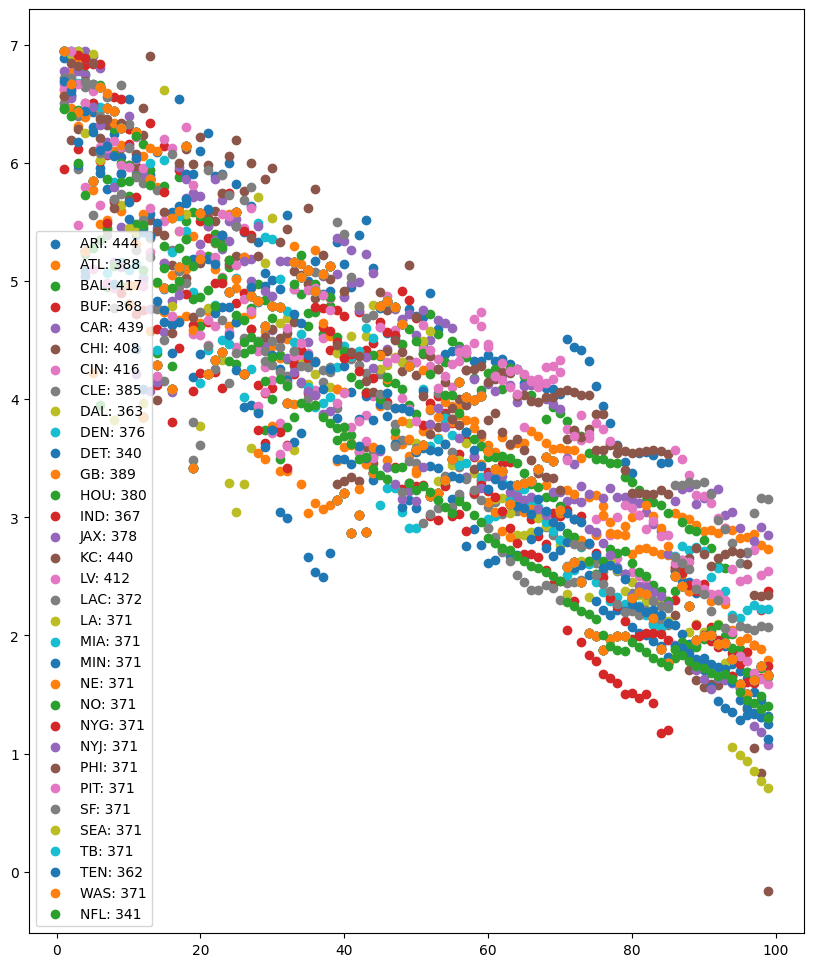

In [76]:
plt.figure(figsize=(10, 12))

for ep_set in ep_sets:
    name, set = ep_set
    plt.scatter(set['Yardline'], set['Max_EP'], label = name+": "+str(int(np.sum(set['Max_EP']))))

plt.scatter(ep_set_nfl['Yardline'], ep_set_nfl['Max_EP'], label = "NFL: "+str(int(np.sum(ep_set_nfl['Max_EP']))))
plt.legend()

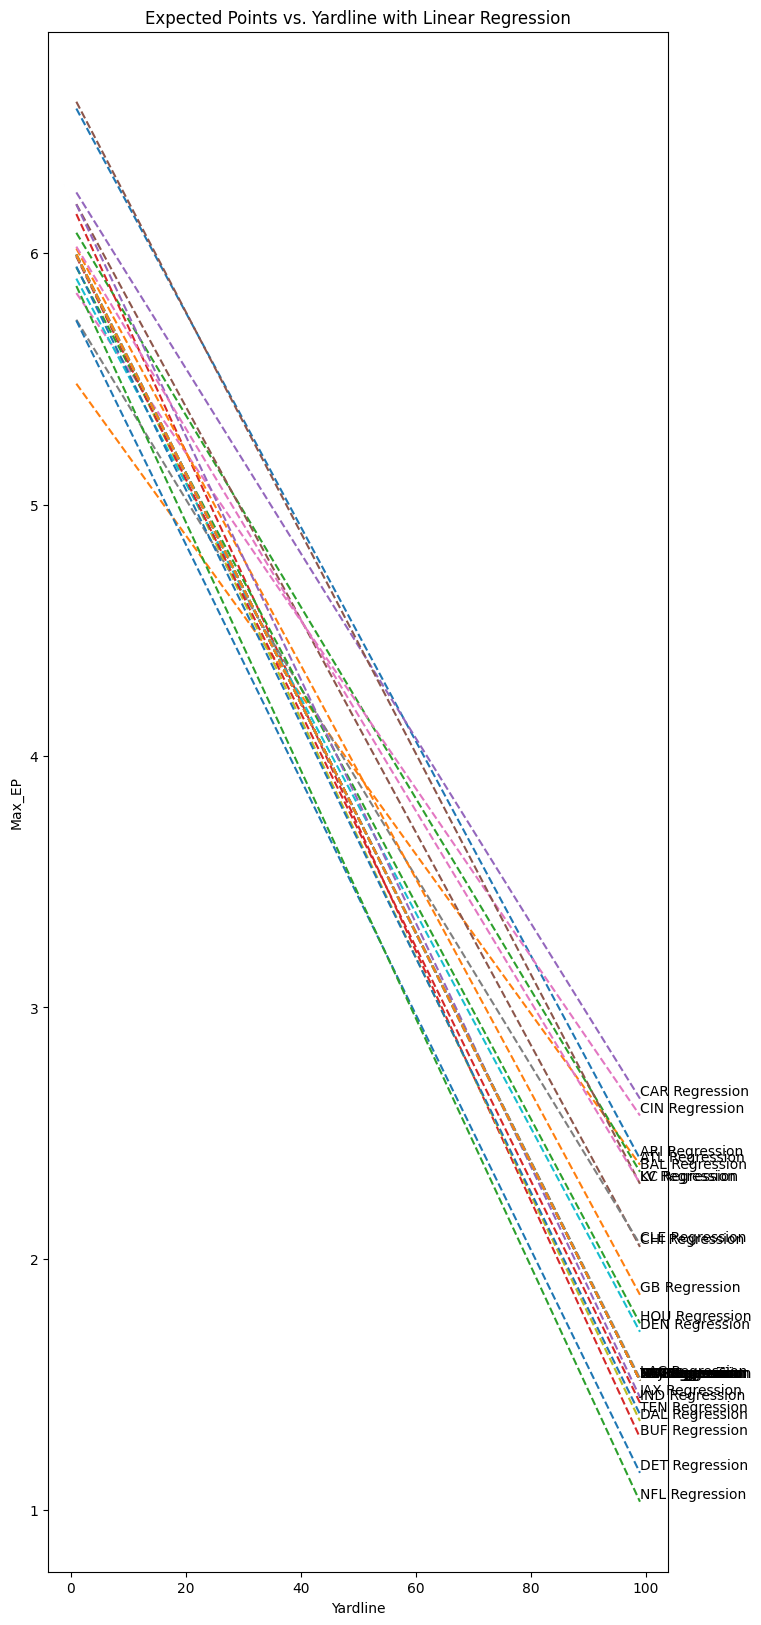

In [77]:

plt.figure(figsize=(8, 20))

# Plot scatter points and regression lines
for ep_set in ep_sets:
    name, set = ep_set
    
    # Compute linear regression line
    coeffs = np.polyfit(set['Yardline'], set['Max_EP'], 1)
    x_vals = np.linspace(min(set['Yardline']), max(set['Yardline']), 100)
    y_vals = np.polyval(coeffs, x_vals)
    
    # Plot regression line
    plt.plot(x_vals, y_vals, linestyle="--", label=f"{name} Regression")

    # Label the line at its rightmost point
    plt.text(x_vals[-1], y_vals[-1], f"{name} Regression", verticalalignment='bottom', fontsize=10)

# Compute and plot NFL regression line
nfl_coeffs = np.polyfit(ep_set_nfl['Yardline'], ep_set_nfl['Max_EP'], 1)
x_vals_nfl = np.linspace(min(ep_set_nfl['Yardline']), max(ep_set_nfl['Yardline']), 100)
y_vals_nfl = np.polyval(nfl_coeffs, x_vals_nfl)

# Plot NFL regression line
plt.plot(x_vals_nfl, y_vals_nfl, linestyle="--", label="NFL Regression")

# Label the NFL line at its rightmost point
plt.text(x_vals_nfl[-1], y_vals_nfl[-1], "NFL Regression", verticalalignment='bottom', fontsize=10)

plt.xlabel("Yardline")
plt.ylabel("Max_EP")
plt.title("Expected Points vs. Yardline with Linear Regression")
plt.show()

In [78]:
# Create a list of (name, total_EP) tuples
ep_sums = [(name, np.sum(df['Max_EP'])) for name, df in ep_sets]

# Sort by total_EP
ep_sums_sorted = sorted(ep_sums, key=lambda x: x[1], reverse=True)  # reverse=True for descending

# Print results
for name, total in ep_sums_sorted:
    print(f"{name}: {total:.2f}")


ARI: 444.18
KC: 440.61
CAR: 439.52
BAL: 417.17
CIN: 416.36
LV: 412.17
CHI: 408.02
GB: 389.86
ATL: 388.83
CLE: 385.78
HOU: 380.53
JAX: 378.34
DEN: 376.63
LAC: 372.01
LA: 371.75
MIA: 371.75
MIN: 371.75
NE: 371.75
NO: 371.75
NYG: 371.75
NYJ: 371.75
PHI: 371.75
PIT: 371.75
SF: 371.75
SEA: 371.75
TB: 371.75
WAS: 371.75
BUF: 368.51
IND: 367.01
DAL: 363.82
TEN: 362.76
DET: 340.60


In [79]:
freq_df = pd.read_csv("frequency.csv")

In [80]:
# Rename for consistency
freq_df.rename(columns={'down': 'Down', 'distance': 'Distance', 'yardline': 'Yardline'}, inplace=True)

# Apply the same filtering logic to match df in ep_sets:
# - down == 1
# - (distance == 10 and yardline >= 10) OR (distance == yardline and yardline < 10)
freq_df_filtered = freq_df[
    (freq_df['Down'] == 1) &
    (
        ((freq_df['Distance'] == 10) & (freq_df['Yardline'] >= 10)) |
        ((freq_df['Distance'] == freq_df['Yardline']) & (freq_df['Yardline'] < 10))
    )
]

tot = np.sum(freq_df_filtered['frequency'])

# Now compute weighted sums
ep_sums = []
for name, df in ep_sets:
    # Merge EP and frequency data on Down, Distance, Yardline
    merged = pd.merge(df, freq_df_filtered, on=['Down', 'Distance', 'Yardline'], how='inner')

    # Compute weighted EP
    merged['weighted_ep'] = merged['Max_EP'] * merged['frequency']
    total_weighted_ep = merged['weighted_ep'].sum()

    ep_sums.append((name, total_weighted_ep/tot))

# Sort and print
ep_sums_sorted = sorted(ep_sums, key=lambda x: x[1], reverse=True)
for name, total in ep_sums_sorted:
    print(f"{name}: {total:.2f}")

ARI: 4.57
KC: 4.35
CAR: 4.28
CHI: 4.22
LV: 4.21
BAL: 4.20
CIN: 4.11
ATL: 3.80
GB: 3.80
HOU: 3.77
JAX: 3.75
CLE: 3.67
DEN: 3.61
DAL: 3.60
IND: 3.60
LA: 3.59
MIA: 3.59
MIN: 3.59
NE: 3.59
NO: 3.59
NYG: 3.59
NYJ: 3.59
PHI: 3.59
PIT: 3.59
SF: 3.59
SEA: 3.59
TB: 3.59
WAS: 3.59
TEN: 3.58
LAC: 3.56
BUF: 3.50
DET: 3.31
